In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import skvideo.io
from tqdm import tqdm
%matplotlib inline

In [2]:
# constants
DATA_PATH = '/kaggle/dev/speed-challenge-2017-data/data'
TRAIN_VIDEO = os.path.join(DATA_PATH, 'train.mp4')
TEST_VIDEO = os.path.join(DATA_PATH, 'test.mp4')
CLEAN_DATA_PATH = '/kaggle/dev/speed-challenge-2017-data/clean_data'
CLEAN_IMGS_TRAIN = os.path.join(CLEAN_DATA_PATH, 'train_imgs')
CLEAN_IMGS_TEST = os.path.join(CLEAN_DATA_PATH, 'test_imgs')

train_frames = 20400
test_frames = 1020

## Dataset construction

In [3]:
train_y = list(pd.read_csv(os.path.join(DATA_PATH, 'train.txt'), header=None, squeeze=True))
assert(len(train_y)==train_frames)

In [7]:
def dataset_constructor(video_loc, img_folder, tot_frames, dataset_type):
    meta_dict = {}

    tqdm.write('reading in video file...')
    tot_frames = train_frames
    cap = skvideo.io.vread(video_loc)
     
    tqdm.write('constructing dataset...')
    for idx, frame in enumerate(tqdm(cap)):    
        img_path = os.path.join(img_folder, str(idx)+'.jpg')
        frame_speed = float('NaN') if dataset_type == 'test' else train_y[idx]
        meta_dict[idx] = [img_path, idx, frame_speed]
        skvideo.io.vwrite(img_path, frame)
    meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
    meta_df.columns = ['image_path', 'image_index', 'speed']
    
    tqdm.write('writing meta to csv')
    meta_df.to_csv(os.path.join(CLEAN_DATA_PATH, dataset_type+'_meta.csv'), index=False)
    
    return "done dataset_constructor"

In [8]:
# train data
dataset_constructor(TRAIN_VIDEO, CLEAN_IMGS_TRAIN, train_frames, 'train')

reading in video file...


  0%|          | 2/20400 [00:00<32:12, 10.55it/s]

constructing dataset...


100%|██████████| 20400/20400 [33:28<00:00, 10.16it/s]

writing meta to csv


'done dataset_constructor'

In [ ]:
# test data
dataset_constructor(TEST_VIDEO, CLEAN_IMGS_TEST, test_frames, 'test')

reading in video file...


  0%|          | 2/10798 [00:00<09:34, 18.79it/s]

constructing dataset...


 24%|██▍       | 2616/10798 [02:21<07:19, 18.60it/s]

## Dataset verification

### train 

In [35]:
train_meta = pd.read_csv(os.path.join(CLEAN_DATA_PATH, 'train_meta.csv'))
assert(train_meta.shape[0] == train_frames)
assert(train_meta.shape[1] == 3)

In [ ]:
train_meta.head()

speed: 28.105569


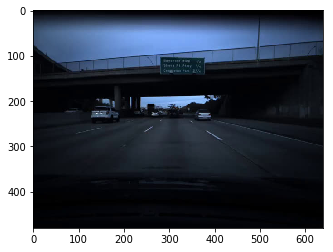

speed: 28.105569


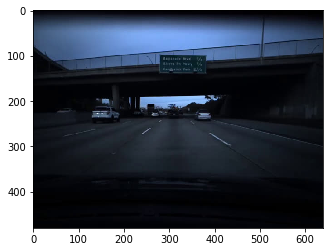

speed: 28.106527


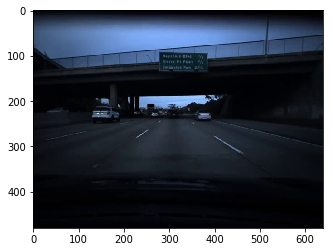

speed: 28.130404


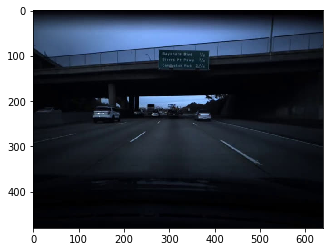

speed: 28.109243


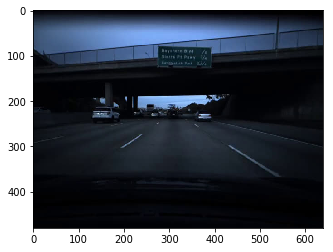

speed: 28.088572


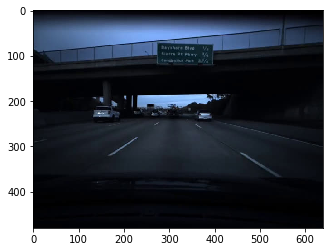

speed: 28.034211


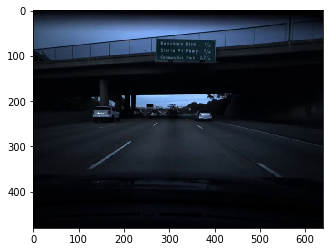

speed: 28.018491


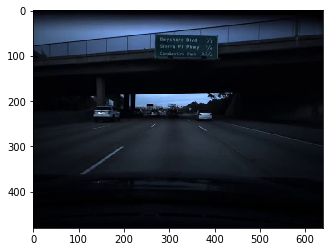

speed: 27.986624


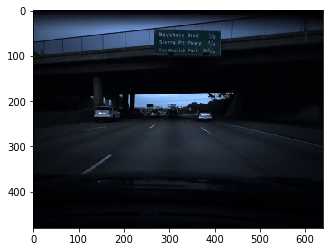

speed: 28.016352


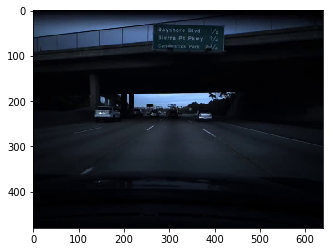

speed: 27.981986


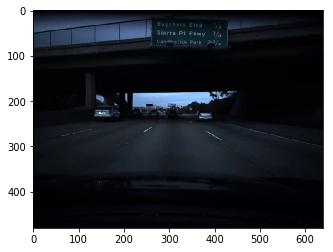

speed: 27.978625


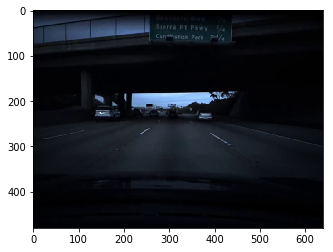

speed: 28.032331


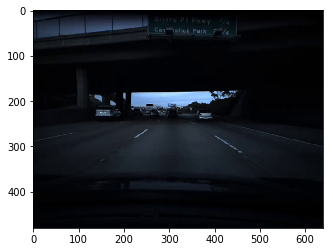

speed: 27.960219


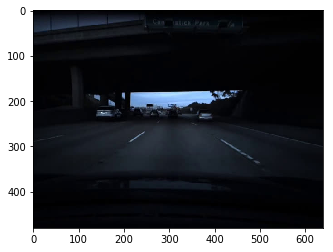

speed: 27.937178


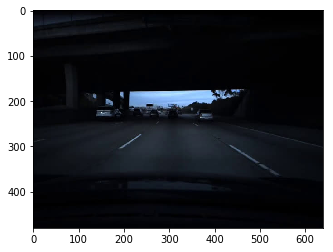

speed: 27.940599


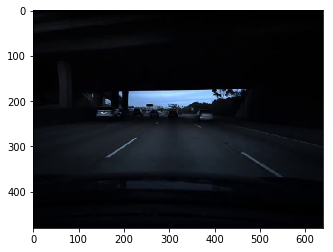

speed: 27.908579


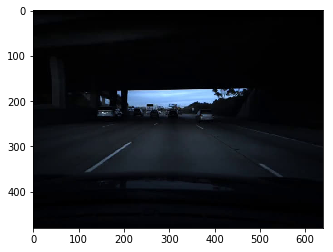

speed: 27.898606


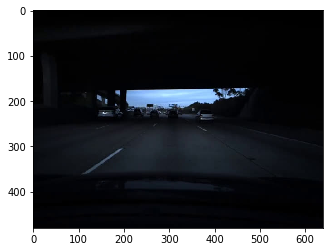

speed: 27.855982


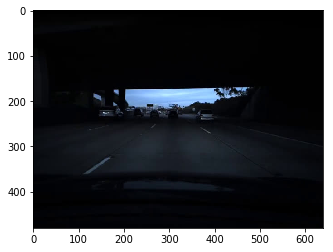

speed: 27.795581


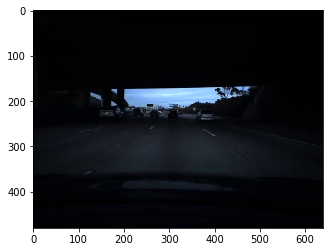

speed: 27.850634


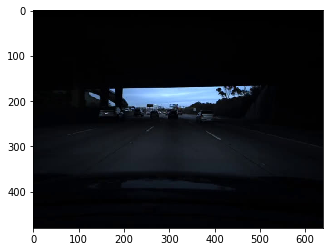

speed: 27.839349


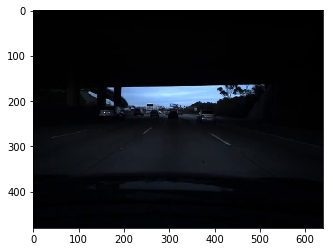

speed: 27.824348


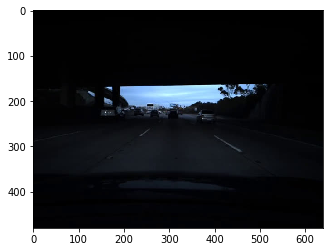

speed: 27.759608


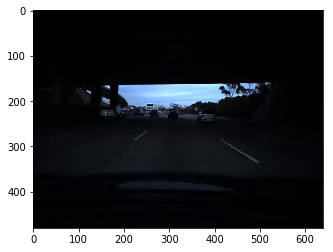

speed: 27.830055


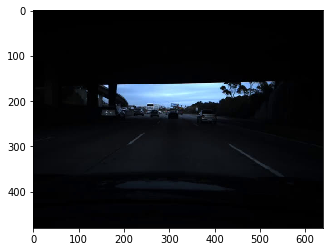

speed: 27.761886


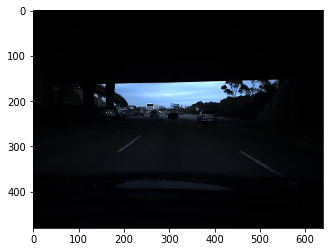

speed: 27.694763


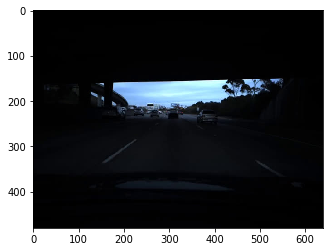

speed: 27.761203


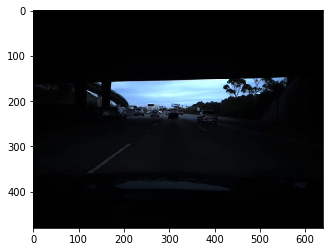

speed: 27.691932


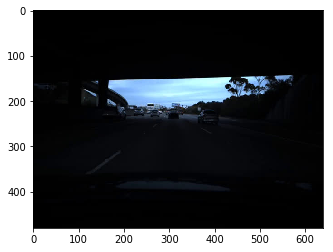

speed: 27.666086


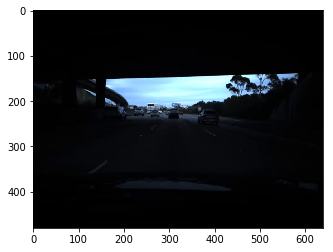

speed: 27.723912


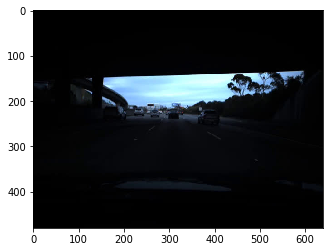

speed: 27.639469


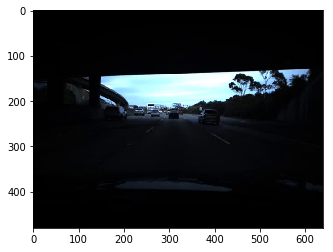

speed: 27.612874


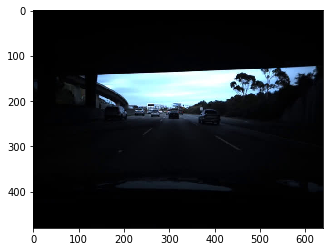

speed: 27.638534


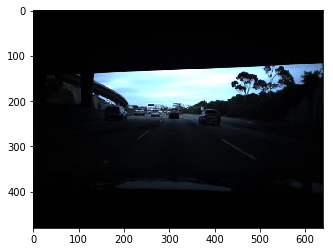

speed: 27.606098


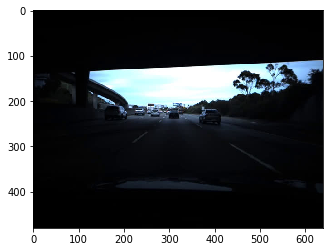

speed: 27.593209


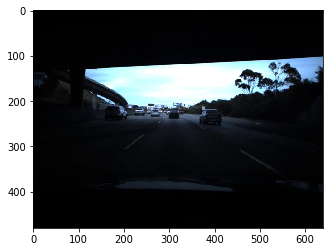

speed: 27.573926


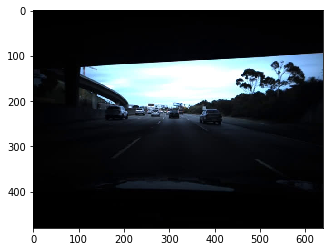

speed: 27.561151


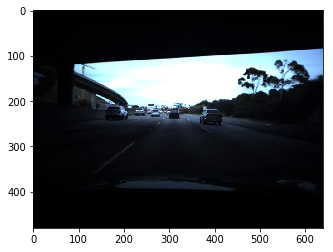

speed: 27.559232


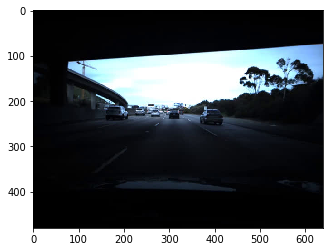

speed: 27.528067


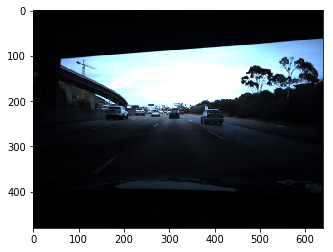

speed: 27.522542


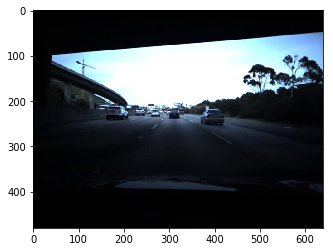

speed: 27.531058


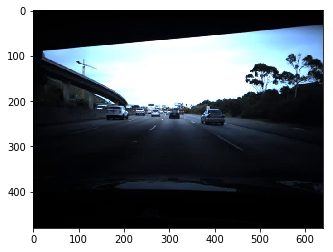

speed: 27.493015


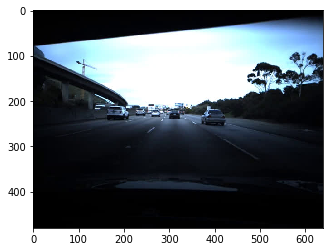

speed: 27.487706


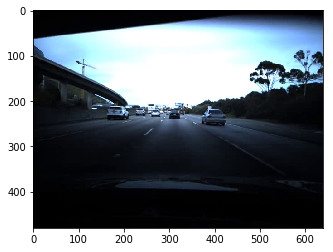

speed: 27.440943


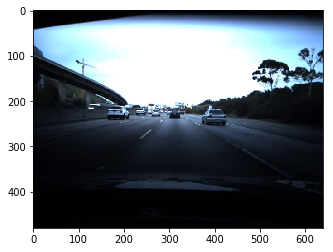

speed: 27.439646


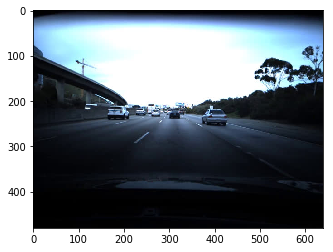

speed: 27.412907


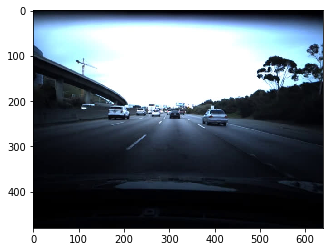

speed: 27.401744


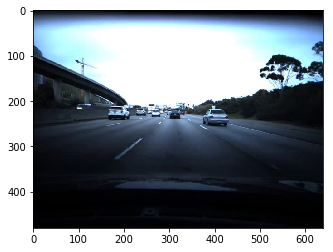

speed: 27.396007


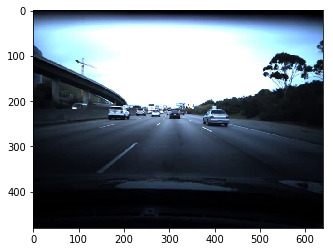

speed: 27.35751


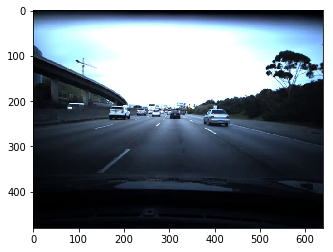

In [36]:
for i in range(50):
    print('speed:',train_meta['speed'][i] )
    img=mpimg.imread(train_meta['image_path'][i])
    plt.imshow(img)
    plt.show()

### test

In [ ]:
test_meta = pd.read_csv(os.path.join(CLEAN_DATA_PATH, 'test_meta.csv'))
assert(train_meta.shape[0] == test_frames)
assert(train_meta.shape[1] == 3)

In [ ]:
test_meta.head()